In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def k_fn(X1, X2):
    """Computes (N,M) covariances. X1 is (N,D) and X2 is (M,D)"""
    Delta = np.sqrt((np.sum(X1*X1, 1)[:, None] - np.dot(X1, (2*X2.T)))
                    + np.sum(X2*X2, 1)[None, :])
    return (1 + Delta) * np.exp(-Delta)

In [4]:
X_grid = np.arange(0, 500, 0.1)[:, None]
N_grid = X_grid.shape[0]
K_grid = k_fn(X_grid, X_grid) + 1e-9*np.eye(N_grid)
L_grid = np.linalg.cholesky(K_grid)
f_grid = np.dot(L_grid, np.random.randn(N_grid))

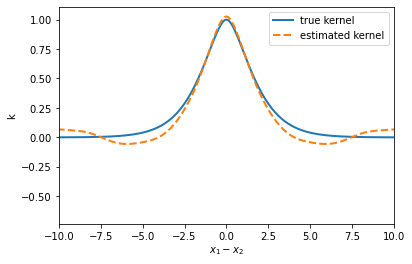

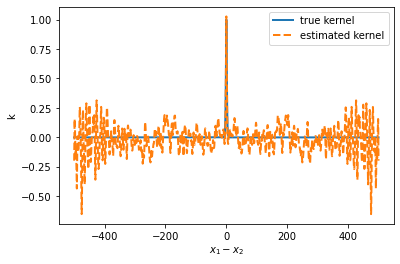

In [5]:
# Mean over all function values
m = np.mean(f_grid)
# Repeat function values along each axes so that we can easily enumerate
# over all pairs
F1_grid = np.transpose([f_grid] * N_grid)
F2_grid = np.tile(f_grid, (N_grid, 1))
# Differences between locations
X_diff = np.concatenate((np.flip(-X_grid[0:-1]), X_grid[1:-1]), axis=0)
# True kernel function values
k_true = np.concatenate((np.flip(K_grid[0][0:-1]), K_grid[0][1:-1]), axis=0)
# Estimate empirical covariance for each delta
cov_emp = np.zeros(N_grid-1)
# Each pair of F1_grid, F2_grid (off-)diagonals
for nn in range(N_grid-1):
    N_pairs = N_grid - nn
    cov_emp[nn] = np.dot(np.diag(F1_grid, nn) - m,
                         np.diag(F2_grid, nn) - m) / N_pairs
k_est = np.concatenate((np.flip(cov_emp), cov_emp[1:]), axis=0)
# Visualise true and estimated kernel function
plt.figure(1)
plt.clf()
plt.plot(X_diff, k_true, linewidth=2)
plt.plot(X_diff, k_est, linestyle='dashed', linewidth=2)
plt.xlim([-10, 10])
plt.legend(['true kernel', 'estimated kernel'])
plt.xlabel('$x_1-x_2$')
plt.ylabel('k')
plt.show()
plt.figure(2)
plt.clf()
plt.plot(X_diff, k_true, linewidth=2)
plt.plot(X_diff, k_est, linestyle='dashed', linewidth=2)
plt.legend(['true kernel', 'estimated kernel'])
plt.xlabel('$x_1-x_2$')
plt.ylabel('k')
plt.show()

In [11]:
F2_grid

array([[-0.72217364, -0.62078484, -0.5976655 , ...,  0.16857773,
         0.24570338,  0.3254076 ],
       [-0.72217364, -0.62078484, -0.5976655 , ...,  0.16857773,
         0.24570338,  0.3254076 ],
       [-0.72217364, -0.62078484, -0.5976655 , ...,  0.16857773,
         0.24570338,  0.3254076 ],
       ...,
       [-0.72217364, -0.62078484, -0.5976655 , ...,  0.16857773,
         0.24570338,  0.3254076 ],
       [-0.72217364, -0.62078484, -0.5976655 , ...,  0.16857773,
         0.24570338,  0.3254076 ],
       [-0.72217364, -0.62078484, -0.5976655 , ...,  0.16857773,
         0.24570338,  0.3254076 ]])